In [4]:
import pandas as pd
import anndata as ad
import scanpy as sc
import pyreadr
import os

In [6]:
wkdir = '/home/jing/Downloads/lypi_DATA/41556_2019_439_MOESM4_ESM/'


In [48]:
adata= sc.read_h5ad(os.path.join(wkdir,'lypi_1321_anndata.h5ad'))

In [49]:
adata.obs

,nGene,nUMI,metadata....experiment..,nCount_RNA,nFeature_RNA,cell_type
2018_2_HSPC_AAACCTGAGTGTCTCA,1724,4119.0,4,4119.0,1724,Ery/Mk prog.
2018_2_HSPC_AAACCTGCACAGAGGT,2766,9058.0,4,9058.0,2766,Neutro prog.
2018_2_HSPC_AAACCTGGTACGAAAT,4414,18694.0,4,18693.0,4413,Mono prog.
2018_2_HSPC_AAACCTGGTCCATGAT,1295,2772.0,4,2772.0,1295,Ery/Mk prog.
2018_2_HSPC_AAACCTGGTTCCACTC,2663,7815.0,4,7815.0,2663,Gran/Mono prog.
...,...,...,...,...,...,...
2017_9_totalBM_TTTGGTTGTACGCTGC,1182,3312.0,3,3311.0,1181,Neutrophils
2017_9_totalBM_TTTGGTTTCTGATACG,1097,3192.0,3,3192.0,1097,Neutrophils
2017_9_totalBM_TTTGTCAAGTAACCCT,1361,3134.0,3,3134.0,1361,T cells
2017_9_totalBM_TTTGTCATCCCAGGTG,3047,17889.0,3,17889.0,3047,large pre-B.


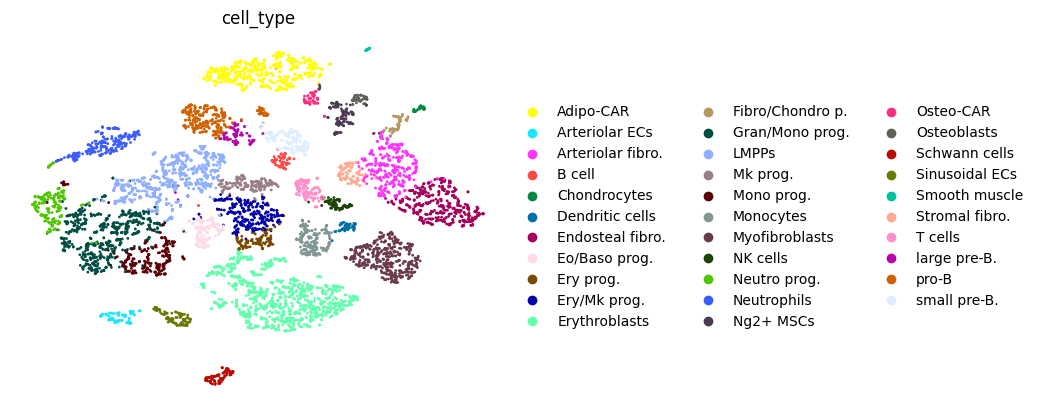

In [51]:

sc.pl.tsne(adata, color='cell_type',  frameon=False)

In [52]:
sc.tl.rank_genes_groups(adata, groupby="cell_type", method="wilcoxon")

/home/jing/miniforge3/envs/cstar/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:435: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/home/jing/miniforge3/envs/cstar/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:437: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/home/jing/miniforge3/envs/cstar/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:440: PerformanceWa

In [54]:
import decoupler as dc
net = dc.get_collectri(organism='mouse', split_complexes=False)
new_adata = adata
#new_adata.var_names = new_adata.var_names.str.upper()
dc.run_ulm(
    mat=new_adata,
    net=net,
    source='source',
    target='target',
    weight='weight',
    verbose=True,
    use_raw=False
)


0.00B [00:00, ?B/s]

Running ulm on mat with 7497 samples and 16701 targets for 655 sources.


In [55]:
new_adata.obsm['collectri_ulm_estimate'] = new_adata.obsm['ulm_estimate'].copy()
new_adata.obsm['collectri_ulm_pvals'] = new_adata.obsm['ulm_pvals'].copy()
acts = dc.get_acts(new_adata, obsm_key='ulm_estimate')

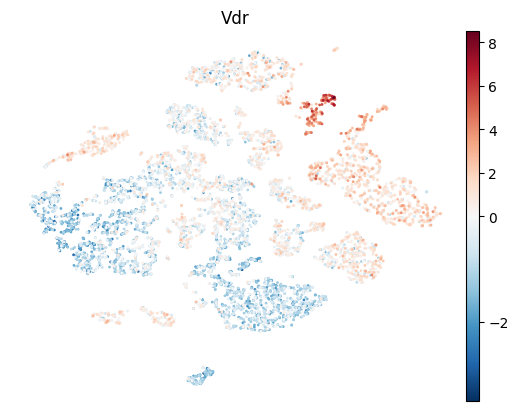

In [61]:
sc.pl.tsne(acts, color=['Vdr'], cmap='RdBu_r', vcenter=0,frameon=False)

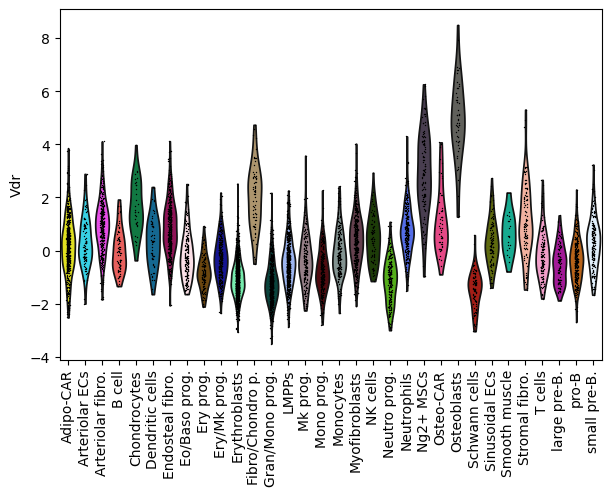

In [59]:
sc.pl.violin(acts, keys=['Vdr'], groupby='cell_type', rotation=90)